# Notebook description

This notebook contains all the code required to run YOLOv5 detections locally. It uses the https://github.com/zldrobit/yolov5 scripts, the weights obtained from the previous YOLO training (.pt and .tflite files) and some modifications required to make the YOLOv5 model runs on top of a Raspberry Pi.

In [1]:
#Installing the appropiate tensorflow version
!pip install tensorflow==2.3.1

# Imports
Important: Uncomment the third line if you haven't cloned the yolov5 data.

In [2]:
import torch #It's required by YOLO
import tensorflow as tf
#!git clone https://github.com/zldrobit/yolov5 #uncomment this if this is your first run
%cd yolov5
!git checkout tf-android
print(tf.__version__)

/home/sergio/PythonProjects/Face Mask Detection/yolov5
M	android/app/src/main/assets/coco.txt
M	detect.py
M	tutorial.ipynb
Already on 'tf-android'
Your branch is up to date with 'origin/tf-android'.
2.3.1


# Requirements installation

In [3]:
#Let's install all dependencies indicated at requirements.txt file
#In addition, let's prompt if any GPU is available
!pip install -r requirements.txt
print('All set. Using PyTorch version %s with %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

All set. Using PyTorch version 1.7.0 with CPU


/home/sergio/anaconda3/lib/python3.7/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729138878/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


# PyTorch weights testing on images
Let's make some detections on test data. Before doing so, remember to modify the "names" list at line 157 of detect.py file.

In [5]:
!python detect.py --weights weights/best.pt --img 416 --conf 0.4 --source ../test_images

Namespace(agnostic_nms=False, augment=False, cfg='./models/yolov5s.yaml', classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=[416], iou_thres=0.45, name='exp', no_tf_nms=False, project='runs/detect', save_conf=False, save_txt=False, source='../test_images', tfl_detect=False, tfl_int8=False, update=False, view_img=False, weights=['weights/best.pt'])
/home/sergio/anaconda3/lib/python3.7/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729138878/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0
Using torch 1.7.0 CPU

Fusing layers... 


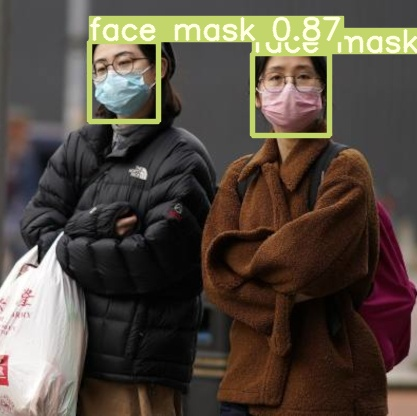

In [6]:
from IPython.display import Image
Image(filename='runs/detect/exp7/testimage1.jpg', width=416)

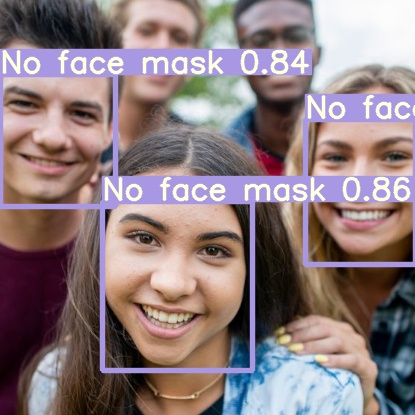

In [7]:
Image(filename='runs/detect/exp7/testimage2.jpg', width=416)

# PyTorch weights testing using the local webcam

The cell below will launch your local webcam and make detections from there. Keep in mind that the camera quality will affect the detection performance and accuracy, try to use a camera with good resolution.

To exit the camera screen, press Q key.

In [17]:
!python detect.py --weights weights/best.pt --img 416 --conf 0.45 --source 0 --classes 0 1

Namespace(agnostic_nms=False, augment=False, cfg='./models/yolov5s.yaml', classes=[0, 1], conf_thres=0.45, device='', exist_ok=False, img_size=[416], iou_thres=0.45, name='exp', no_tf_nms=False, project='runs/detect', save_conf=False, save_txt=False, source='0', tfl_detect=False, tfl_int8=False, update=False, view_img=False, weights=['weights/best.pt'])
/home/sergio/anaconda3/lib/python3.7/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729138878/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0
Using torch 1.7.0 CPU

Fusing layers... 
Model Summ

0: 320x416 1 No face masks, Done. (0.146s)
0: 320x416 1 No face masks, Done. (0.115s)
0: 320x416 1 face masks, 1 No face masks, Done. (0.114s)
0: 320x416 1 face masks, 1 No face masks, Done. (0.126s)
0: 320x416 1 face masks, 1 No face masks, Done. (0.128s)
0: 320x416 1 No face masks, Done. (0.132s)
0: 320x416 1 No face masks, Done. (0.119s)
0: 320x416 1 No face masks, Done. (0.114s)
0: 320x416 1 No face masks, Done. (0.128s)
0: 320x416 1 No face masks, Done. (0.150s)
0: 320x416 1 No face masks, Done. (0.144s)
0: 320x416 1 No face masks, Done. (0.139s)
0: 320x416 1 No face masks, Done. (0.116s)
0: 320x416 1 No face masks, Done. (0.112s)
0: 320x416 1 No face masks, Done. (0.110s)
0: 320x416 1 No face masks, Done. (0.105s)
0: 320x416 1 No face masks, Done. (0.127s)
0: 320x416 1 No face masks, Done. (0.132s)
0: 320x416 1 No face masks, Done. (0.126s)
0: 320x416 1 No face masks, Done. (0.132s)
0: 320x416 1 No face masks, Done. (0.132s)
0: 320x416 1 No face masks, Done. (0.131s)
0: 320x416 1

0: 320x416 1 face masks, 1 No face masks, Done. (0.144s)
0: 320x416 1 No face masks, Done. (0.120s)
0: 320x416 1 No face masks, Done. (0.109s)
0: 320x416 1 No face masks, Done. (0.106s)
0: 320x416 1 No face masks, Done. (0.106s)
0: 320x416 1 No face masks, Done. (0.104s)
0: 320x416 1 No face masks, Done. (0.104s)
0: 320x416 1 No face masks, Done. (0.106s)
0: 320x416 1 No face masks, Done. (0.110s)
0: 320x416 1 No face masks, Done. (0.121s)
0: 320x416 1 No face masks, Done. (0.147s)
0: 320x416 1 No face masks, Done. (0.142s)
0: 320x416 1 No face masks, Done. (0.148s)
0: 320x416 1 No face masks, Done. (0.125s)
0: 320x416 1 No face masks, Done. (0.144s)
0: 320x416 1 No face masks, Done. (0.108s)
0: 320x416 1 No face masks, Done. (0.107s)
0: 320x416 1 No face masks, Done. (0.113s)
0: 320x416 1 No face masks, Done. (0.105s)
0: 320x416 1 No face masks, Done. (0.111s)
0: 320x416 1 No face masks, Done. (0.109s)
0: 320x416 1 No face masks, Done. (0.109s)
0: 320x416 1 No face masks, Done. (0.105

# TFLite weights testing on images
We're going to check if the TFLite weights are correctly loaded by the TFLite interpreter.

In [18]:
!python detect.py --weight weights/best-fp16.tflite --img 416 --source ../test_images --classes 0 1

Namespace(agnostic_nms=False, augment=False, cfg='./models/yolov5s.yaml', classes=[0, 1], conf_thres=0.25, device='', exist_ok=False, img_size=[416], iou_thres=0.45, name='exp', no_tf_nms=False, project='runs/detect', save_conf=False, save_txt=False, source='../test_images', tfl_detect=False, tfl_int8=False, update=False, view_img=False, weights=['weights/best-fp16.tflite'])
/home/sergio/anaconda3/lib/python3.7/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729138878/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0
Using torch 1.7.0 CPU

2020-1

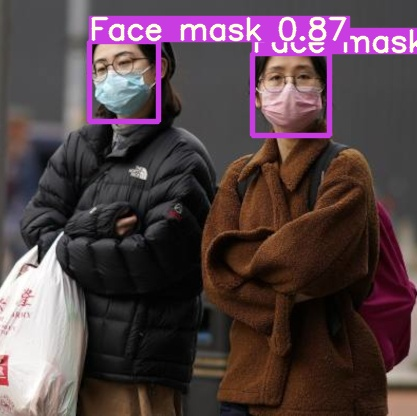

In [11]:
from IPython.display import Image
Image(filename='runs/detect/exp10/testimage1.jpg', width=416)

# TFLite weights testing on webcam

The below line will launch your local webcam and make detections from there. As before, my recommendation is to use a camera with good resolution.

**IMPORTANT:** Modify line 339 in detect.py -> cv2.imshow(p, im0) by cv2.imshow(str(p), im0), otherwise it won't work.

To exit the camera screen, press Q key.

In [23]:
!python detect.py --weights weights/best-fp16.tflite --img 416 --conf 0.45 --source 0 --classes 0 1

Namespace(agnostic_nms=False, augment=False, cfg='./models/yolov5s.yaml', classes=[0, 1], conf_thres=0.45, device='', exist_ok=False, img_size=[416], iou_thres=0.45, name='exp', no_tf_nms=False, project='runs/detect', save_conf=False, save_txt=False, source='0', tfl_detect=False, tfl_int8=False, update=False, view_img=False, weights=['weights/best-fp16.tflite'])
/home/sergio/anaconda3/lib/python3.7/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729138878/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0
Using torch 1.7.0 CPU

2020-12-10 16:20:55

0: 416x416 1 Face masks, Done. (0.109s)
0: 416x416 1 Face masks, Done. (0.088s)
0: 416x416 1 Face masks, Done. (0.085s)
0: 416x416 1 Face masks, Done. (0.085s)
0: 416x416 1 Face masks, Done. (0.085s)
0: 416x416 1 Face masks, Done. (0.087s)
0: 416x416 Done. (0.082s)
0: 416x416 Done. (0.087s)
0: 416x416 Done. (0.097s)
0: 416x416 Done. (0.077s)
0: 416x416 1 Face masks, Done. (0.085s)
0: 416x416 1 Face masks, Done. (0.086s)
0: 416x416 1 Face masks, Done. (0.086s)
0: 416x416 1 Face masks, Done. (0.076s)
0: 416x416 1 Face masks, Done. (0.082s)
0: 416x416 1 Face masks, Done. (0.082s)
0: 416x416 1 Face masks, Done. (0.091s)
0: 416x416 1 Face masks, Done. (0.077s)
0: 416x416 1 Face masks, Done. (0.084s)
0: 416x416 1 Face masks, Done. (0.174s)
0: 416x416 1 Face masks, Done. (0.170s)
0: 416x416 1 Face masks, Done. (0.163s)
0: 416x416 1 Face masks, Done. (0.174s)
0: 416x416 1 Face masks, Done. (0.155s)
0: 416x416 1 Face masks, Done. (0.181s)
0: 416x416 1 Face masks, Done. (0.179s)
0: 416x416 1 Fac

0: 416x416 1 Face masks, Done. (0.167s)
0: 416x416 1 Face masks, Done. (0.165s)
0: 416x416 1 Face masks, Done. (0.174s)
0: 416x416 1 Face masks, Done. (0.169s)
0: 416x416 1 Face masks, Done. (0.157s)
0: 416x416 1 Face masks, Done. (0.170s)
0: 416x416 1 Face masks, Done. (0.156s)
0: 416x416 1 Face masks, Done. (0.165s)
0: 416x416 1 Face masks, Done. (0.168s)
0: 416x416 1 Face masks, Done. (0.171s)
0: 416x416 1 Face masks, Done. (0.176s)
0: 416x416 1 Face masks, Done. (0.175s)
0: 416x416 1 Face masks, Done. (0.202s)
0: 416x416 1 Face masks, Done. (0.159s)
0: 416x416 1 Face masks, Done. (0.170s)
0: 416x416 1 Face masks, Done. (0.157s)
0: 416x416 1 Face masks, Done. (0.152s)
0: 416x416 1 Face masks, Done. (0.167s)
0: 416x416 1 Face masks, Done. (0.180s)
0: 416x416 1 Face masks, Done. (0.145s)
0: 416x416 1 Face masks, Done. (0.192s)
0: 416x416 1 Face masks, Done. (0.158s)
0: 416x416 1 Face masks, Done. (0.151s)
0: 416x416 1 Face masks, Done. (0.171s)
0: 416x416 1 Face masks, Done. (0.181s)


# TFLite weights testing on webcam with TFLite interpreter

The below line will launch your local webcam and make detections using the TFLite interpreter.

To exit the camera screen, press Q key.

In [14]:
#IMPORTANT! Uncomment and run the line below if your computer hasn't installed TFLite interpreter on it.
#!pip3 https://github.com/google-coral/pycoral/releases/download/release-frogfish/tflite_runtime-2.5.0-cp36-cp36m-linux_x86_64.whl
#It will work only for Linux on x86_64 architecture.
#To find the proper version for your computer, check this link https://www.tensorflow.org/lite/guide/python

In [15]:
!python detect4pi.py --weights weights/best-fp16.tflite --img 416 --conf 0.45 --source 0 --classes 0 1

Namespace(agnostic_nms=False, augment=False, cfg='./models/yolov5s.yaml', classes=[0, 1], conf_thres=0.45, device='', edgetpu=False, exist_ok=False, img_size=[416], iou_thres=0.45, name='exp', no_tf_nms=False, project='runs/detect', save_conf=False, save_txt=False, source='0', tfl_detect=False, tfl_int8=False, update=False, view_img=False, weights=['weights/best-fp16.tflite'])
/home/sergio/anaconda3/lib/python3.7/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729138878/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0
Using torch 1.7.0 CPU

2020

0: 416x416 Done. (0.114s)
0: 416x416 Done. (0.090s)
0: 416x416 Done. (0.092s)
0: 416x416 Done. (0.090s)
0: 416x416 Done. (0.079s)
0: 416x416 Done. (0.084s)
0: 416x416 Done. (0.086s)
0: 416x416 Done. (0.093s)
0: 416x416 Done. (0.089s)
0: 416x416 Done. (0.091s)
0: 416x416 Done. (0.088s)
0: 416x416 Done. (0.088s)
0: 416x416 Done. (0.085s)
0: 416x416 Done. (0.089s)
0: 416x416 Done. (0.086s)
0: 416x416 Done. (0.086s)
0: 416x416 Done. (0.091s)
0: 416x416 Done. (0.098s)
0: 416x416 Done. (0.091s)
0: 416x416 Done. (0.083s)
0: 416x416 Done. (0.089s)
0: 416x416 Done. (0.091s)
0: 416x416 Done. (0.090s)
0: 416x416 Done. (0.090s)
0: 416x416 Done. (0.088s)
0: 416x416 Done. (0.091s)
0: 416x416 Done. (0.085s)
0: 416x416 Done. (0.099s)
0: 416x416 Done. (0.088s)
0: 416x416 Done. (0.085s)
0: 416x416 1 Face masks, Done. (0.082s)
0: 416x416 1 Face masks, Done. (0.094s)
0: 416x416 Done. (0.083s)
0: 416x416 Done. (0.082s)
0: 416x416 Done. (0.079s)
0: 416x416 Done. (0.082s)
0: 416x416 Done. (0.081s)
0: 416x416

# Final thoughts

Alright, if you reached this point then I'll assume everything went OK. Now it's time to deploy the model on the RPi board. See you there!